<a href="https://colab.research.google.com/github/ndeleonardis/DataSetNoeliaDeLeonardis/blob/main/PF_NLP_Noelia_De_Leonardis_Data_Science_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install textblob

In [ ]:
pip install wordcloud

In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargamaos el archivo usamos URL cruda del archivo CSV que esta en nuestro GitHub
url = 'https://raw.githubusercontent.com/ndeleonardis/DataSetNoeliaDeLeonardis/main/amazon_reviews.csv'

# Cargar el archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(url)
    print("El archivo CSV se ha cargado exitosamente.")
except Exception as e:
    print("Se produjo un error al cargar el archivo CSV:", e)

df.head()

El archivo CSV se ha cargado exitosamente.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


# 1.   Text Preprocessing

In [ ]:
# Normalizing Case Folding
df['reviewText'] = df['reviewText'].str.lower()

# Punctuations
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')

# Numbers
df['reviewText'] = df['reviewText'].str.replace('\d', '')

In [ ]:
# Stopwords

import nltk
nltk.download('stopwords')  # Download the stopwords dataset
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Rarewords

drops = pd.Series(' '.join(df['reviewText']).split()).value_counts()[-1000:]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
# Tokenization
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
!python -m textblob.download_corpora

df["reviewText"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, sprung, higher, capacity, th..."
3,"[think, worked, great.had, diff, bran, 64gb, c..."
4,"[bought, retail, packaging, arrived, legit, or..."


In [ ]:
# Lemmatization

# Kelimeleri köklerine ayırma işlemidir.
# nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['reviewText'].head(10)

,reviewText
0,issues.
1,"purchased device, worked advertised. never muc..."
2,work expected. sprung higher capacity. think m...
3,think worked great.had diff. bran 64gb card we...
4,"bought retail packaging, arrived legit, orange..."
5,mini storage. anything else supposed to. purch...
6,phone never skip beat. file transfer speedy co...
7,hard believe affordable digital become. 32 gb ...
8,work htc rezound. running short space 64gb san...
9,"galaxy s4, super fast card, totally happy, hap..."


# 2. Text Visualization

In [26]:
# Terim Frekanslarının Hesaplanması

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,issues.,115.00
1,purchased,331.00
2,"device,",38.00
3,worked,436.00
4,advertised.,49.00


In [27]:
tf.shape

(15465, 2)

In [28]:
tf["words"].nunique()

15465

In [29]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,tf
count,15465.00
mean,8.51
std,55.88
min,1.00
5%,1.00
10%,1.00
25%,1.00
50%,1.00
75%,3.00
80%,4.00


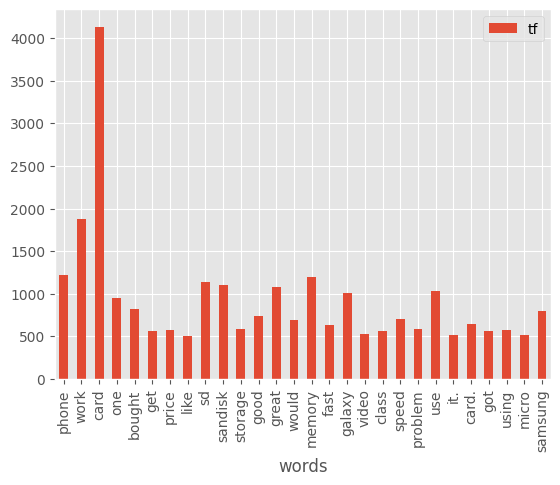

In [30]:
# Barplot

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

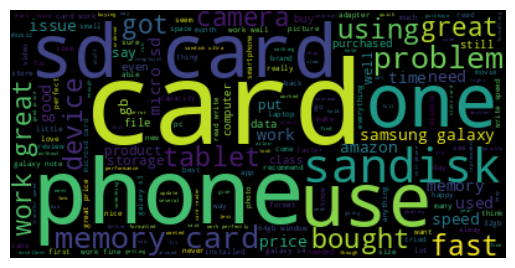

In [31]:
# Wordcloud

text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

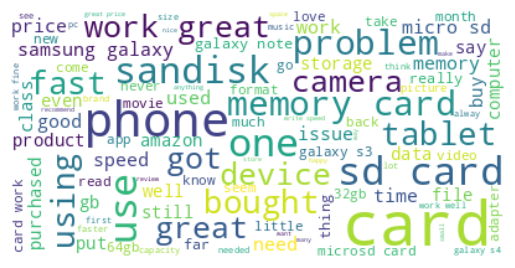

In [32]:
# daha açık renkli bir grafik
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

# 3. Sentiment Analysis

In [33]:
# NLTK already has a built-in, pretrained sentiment analyzer
# called VADER (Valence Aware Dictionary and sEntiment Reasoner).

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected. sprung higher capacity. think m...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great.had diff. bran 64gb card we...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, orange...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [35]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [36]:
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [37]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [38]:
# Por ejemplo, si queremos agrandar las reseñas:
df["reviewText"].apply(lambda x: x.upper())

,reviewText
0,ISSUES.
1,"PURCHASED DEVICE, WORKED ADVERTISED. NEVER MUC..."
2,WORK EXPECTED. SPRUNG HIGHER CAPACITY. THINK M...
3,THINK WORKED GREAT.HAD DIFF. BRAN 64GB CARD WE...
4,"BOUGHT RETAIL PACKAGING, ARRIVED LEGIT, ORANGE..."
...,...
4910,"BOUGHT SANDISK 16GB CLASS 10 USE HTC INSPIRE, ..."
4911,USED EXTENDING CAPABILITY SAMSUNG GALAXY NOTE ...
4912,GREAT CARD FAST RELIABLE. COME OPTIONAL ADAPTE...
4913,"GOOD AMOUNT SPACE STUFF WANT DO, FIT GOPRO. SAY?"


In [39]:
# ahora calculemos las puntuaciones, por ejemplo, para 10 de ellos.
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

,reviewText
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
3,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp..."
4,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.096, 'neu': 0.593, 'pos': 0.311, 'co..."
7,"{'neg': 0.035, 'neu': 0.748, 'pos': 0.217, 'co..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."


In [40]:

# Entonces, ¿qué hacemos si queremos seleccionar solo un componente de este diccionario?
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

,reviewText
0,0.00
1,0.00
2,0.40
3,0.71
4,0.86
5,0.00
6,0.90
7,0.81
8,0.00
9,0.92


In [41]:
# hagamos la operación de forma permanente:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased device, worked advertised. never muc...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected. sprung higher capacity. think m...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great.had diff. bran 64gb card we...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.71
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought retail packaging, arrived legit, orange...",5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
